In [1]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
#import imutils

import qrcode


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    

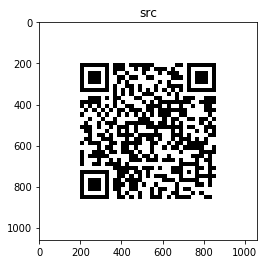

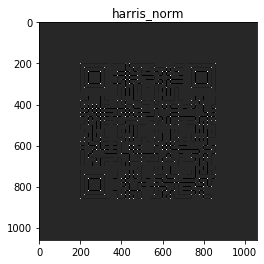

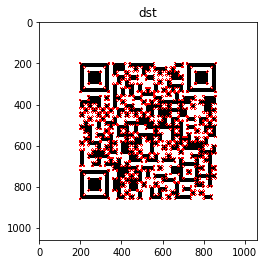

In [2]:
src = cv2.imread('./data/acronet.png', cv2.IMREAD_GRAYSCALE)

harris = cv2.cornerHarris(src, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

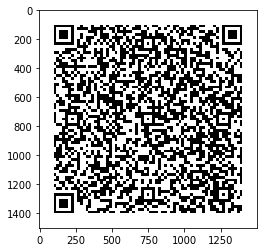

In [3]:
# qr코드 설치하기 , 아나콘다에서 pip install qrcode
qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 20, 
     border = 5) #qr코드 크기

#url 은 짧을수록 인식이 잘된다
url = 'https://search.naver.com/search.naver?where=nexearch&query=%EC%A3%BC%EC%98%88%EC%A7%80&sm=top_lve.agallgrpmamsi0en0sp0&x_nxpr-front=all01-2&ie=utf8'
#url = 'http://www.naver.com'
qr.add_data(url)
qr.make() # qr 생성

img = qr.make_image(fill_color="black", back_color="white") #바이너리화 하기 쉬운 색깔로
plt.imshow(img, cmap="gray")

#저장하기
img.save("./data/naver_qrcode.png")
img = cv2.imread("./data/naver_qrcode.png")
cv2.imwrite("3.png", img)
imshow("", img)

https://search.naver.com/search.naver?where=nexearch&query=%EC%A3%BC%EC%98%88%EC%A7%80&sm=top_lve.agallgrpmamsi0en0sp0&x_nxpr-front=all01-2&ie=utf8


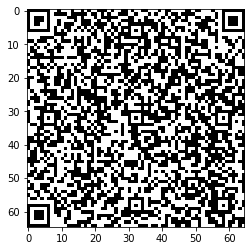

In [5]:
img = cv2.imread("./data/naver_qrcode.png")
qrdecoder = cv2.QRCodeDetector() #qr코드 영역을 찾아주는 함수, 블러링이나 노이즈 떄매 실패할 수 있다.
data,bbox,rectifiedImage = qrdecoder.detectAndDecode(img) 
# 첫번째 qt코드 url, 두번째 어디에qr코드있는지, 회전된거를 다시 똑바로 원위치해서 리턴 
print(data)

imshow('',rectifiedImage )


[Decoded(data=b'http://pyimg.co/dl4cv', type='QRCODE', rect=Rect(left=331, top=225, width=103, height=103), polygon=[Point(x=331, y=225), Point(x=331, y=327), Point(x=434, y=328), Point(x=433, y=225)]), Decoded(data=b'https://www.pyimagesearch.com/', type='QRCODE', rect=Rect(left=89, top=66, width=119, height=120), polygon=[Point(x=89, y=66), Point(x=89, y=185), Point(x=208, y=186), Point(x=207, y=66)]), Decoded(data=b'https://openmv.io/', type='QRCODE', rect=Rect(left=441, top=70, width=122, height=122), polygon=[Point(x=441, y=71), Point(x=441, y=191), Point(x=563, y=192), Point(x=562, y=70)]), Decoded(data=b'0100000000020183', type='DATABAR', rect=Rect(left=292, top=786, width=181, height=94), polygon=[Point(x=292, y=787), Point(x=292, y=879), Point(x=473, y=880), Point(x=473, y=786)]), Decoded(data=b'DL4CV', type='CODE39', rect=Rect(left=294, top=632, width=177, height=98), polygon=[Point(x=294, y=633), Point(x=294, y=729), Point(x=471, y=730), Point(x=471, y=632)]), Decoded(data=b

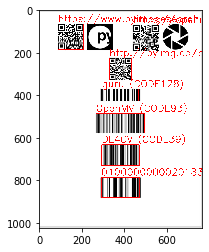

In [6]:
from pyzbar.pyzbar import decode

image = cv2.imread('./data/barqr.jpg')
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = decode(image)
print(code)

for barcode in code:
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2) 
imshow("", image)